# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_640x640' 
# PRETRAINED_MODEL_NAME = 'ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD (Tensorflow Object Detection API)

In [45]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [30]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
No local packages or working download links found for tensorflow-text~=2.1

Obtaining file:///D:/Study/Projects/REAL-TIME%20OBJECT%20DETECTION%20FOR%20ASSISTING%20COMMUNICATION%20IN%20NON-VERBAL%20INDIVIDUALS/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [48]:
# !pip install cython numpy
# !pip install --upgrade cython
# !git clone https://github.com/cocodataset/cocoapi.git
# %cd cocoapi/PythonAPI
# !python setup.py build_ext --inplace
# !python setup.py build_ext install

[WinError 3] The system cannot find the path specified: 'cocoapi/PythonAPI'
D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\cocoapi\PythonAPI\cocoapi\PythonAPI\cocoapi\PythonAPI
running build_ext
skipping 'pycocotools\_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
"C:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\BIN\x86_amd64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD "-ID:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\numpy\core\include" -I../common "-ID:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\include" -IC:\Users\SwSaT\AppData\Local\Programs\Python\Python310\include -IC:\Users\SwSaT\AppData\Local\Programs\Python\Python310\Include "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\INCLUDE" "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\ATL

cl : Command line error D8021 : invalid numeric argument '/Wno-cpp'
error: command 'C:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\BIN\\x86_amd64\\cl.exe' failed with exit code 2


running build_ext
skipping 'pycocotools\_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
"C:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\BIN\x86_amd64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD "-ID:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\numpy\core\include" -I../common "-ID:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\include" -IC:\Users\SwSaT\AppData\Local\Programs\Python\Python310\include -IC:\Users\SwSaT\AppData\Local\Programs\Python\Python310\Include "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\INCLUDE" "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\ATLMFC\INCLUDE" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22621.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22621.0\shared" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22621.0\um" "-IC:\Pro

cl : Command line error D8021 : invalid numeric argument '/Wno-cpp'
error: command 'C:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\BIN\\x86_amd64\\cl.exe' failed with exit code 2


In [ ]:
# !pip install apache-beam
# !pip install avro-python3
# !pip install contextlib2
# !pip install Cython
# !pip install matplotlib
# !pip install pillow

In [9]:
# !pip install Cython
# !pip install gin-config
# !pip install google-api-python-client>=1.6.7
# !pip install immutabledict
# !pip install kaggle>=1.3.9
# !pip install matplotlib
# !pip install oauth2client
!pip install opencv-python-headless 
# !pip install Pillow
# !pip install py-cpuinfo>=3.3.0
!pip install pycocotools
# !pip install PyYAML==5.1
# !pip install sentencepiece
# !pip install seqeval
# !pip install tensorflow~=2.12.0
# !pip install tensorflow-addons
# !pip install tensorflow-datasets
# !pip install tensorflow-hub>=0.6.0
# !pip install tensorflow-model-optimization>=0.4.1
# !pip install tensorflow-text==2.10.0rc0

  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl (38.0 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Study\\Projects\\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\\Verb_Obj\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pycocotools


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [36 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-310\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-310\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-310\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-310\pycocotools
  running build_ext
  cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
  C:\Users\SwSaT\AppData\Local\Temp\pip-build-env-dr7c6sqo\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\SwSaT\AppData\Local\Temp\pip-install-23oi68jf\pycocotools_fb6121663a1446a5a0b4af836d0fe2cc\pycocotools\_ma

In [13]:
pip install tensorflow==2.11.0

                                              0.0/266.3 MB ? eta -:--:--
                                              0.0/266.3 MB 1.9 MB/s eta 0:02:19
                                              0.1/266.3 MB 1.4 MB/s eta 0:03:05
                                              0.2/266.3 MB 1.7 MB/s eta 0:02:35
                                              0.3/266.3 MB 1.7 MB/s eta 0:02:35
                                              0.4/266.3 MB 1.9 MB/s eta 0:02:23
                                              0.5/266.3 MB 1.9 MB/s eta 0:02:19
                                              0.6/266.3 MB 2.0 MB/s eta 0:02:15
                                              0.7/266.3 MB 1.9 MB/s eta 0:02:17
                                              0.8/266.3 MB 2.0 MB/s eta 0:02:16
                                              0.9/266.3 MB 1.9 MB/s eta 0:02:22
                                              0.9/266.3 MB 1.9 MB/s eta 0:02:23
                                              1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.12.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.12.0 requires pycocotools, which is not installed.
apache-beam 2.48.0 requires protobuf<4.24.0,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-text 2.10.0rc0 requires tensorflow<2.11,>=2.10.0rc0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.11.0 which is incompatible.
tf-models-official 2.12.0 requires tensorflow~=2.12.0, but you have tensorflow 2.11.0 which is incompatible

In [64]:
pip install protobuf==3.19.6

                                              0.0/895.7 kB ? eta -:--:--
     -                                       30.7/895.7 kB 1.3 MB/s eta 0:00:01
     --                                    71.7/895.7 kB 787.7 kB/s eta 0:00:02
     --                                    71.7/895.7 kB 787.7 kB/s eta 0:00:02
     --------                               204.8/895.7 kB 1.2 MB/s eta 0:00:01
     -------------                          317.4/895.7 kB 1.4 MB/s eta 0:00:01
     ----------------                       399.4/895.7 kB 1.6 MB/s eta 0:00:01
     ----------------------                 532.5/895.7 kB 1.8 MB/s eta 0:00:01
     ---------------------------            655.4/895.7 kB 1.9 MB/s eta 0:00:01
     ---------------------------------      778.2/895.7 kB 1.9 MB/s eta 0:00:01
     ------------------------------------   870.4/895.7 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 895.7/895.7 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found exis

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.48.0 requires protobuf<4.24.0,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorboard 2.11.2 requires tensorboard-data-server<0.7.0,>=0.6.0, but you have tensorboard-data-server 0.7.1 which is incompatible.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.12.0 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-text 2.10.0rc0 requires tensorflow<2.11,>=2.10.0rc0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.11.0 which is incompatible.
tf-models-official 2.12.0 requires tensorflow~=2.12.0, but you 

In [31]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Running tests under Python 3.10.11: D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detec

In [11]:
# !pip install tensorflow --upgrade

In [13]:
# !pip uninstall protobuf matplotlib -y
# !pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [8]:
import object_detection

In [10]:
!pip list

Package                       Version   Editable project location
----------------------------- --------- ----------------------------------------------------------------------------------------------------------------------------------
absl-py                       1.4.0
apache-beam                   2.48.0
array-record                  0.4.0
asttokens                     2.2.1
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
bleach                        6.0.0
cachetools                    5.3.1
certifi                       2023.5.7
charset-normalizer            3.1.0
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.3
contextlib2                   21.6.0
contourpy                     1.1.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.35
debugpy                       1.6.7


In [33]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20518283 / 20518283        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [24]:
labels = [{'name': chr(ord('A') + i), 'id': i+1} for i in range(26)]
for label in labels:
    print(label)

{'name': 'A', 'id': 1}
{'name': 'B', 'id': 2}
{'name': 'C', 'id': 3}
{'name': 'D', 'id': 4}
{'name': 'E', 'id': 5}
{'name': 'F', 'id': 6}
{'name': 'G', 'id': 7}
{'name': 'H', 'id': 8}
{'name': 'I', 'id': 9}
{'name': 'J', 'id': 10}
{'name': 'K', 'id': 11}
{'name': 'L', 'id': 12}
{'name': 'M', 'id': 13}
{'name': 'N', 'id': 14}
{'name': 'O', 'id': 15}
{'name': 'P', 'id': 16}
{'name': 'Q', 'id': 17}
{'name': 'R', 'id': 18}
{'name': 'S', 'id': 19}
{'name': 'T', 'id': 20}
{'name': 'U', 'id': 21}
{'name': 'V', 'id': 22}
{'name': 'W', 'id': 23}
{'name': 'X', 'id': 24}
{'name': 'Y', 'id': 25}
{'name': 'Z', 'id': 26}


In [9]:
labels = [{'name': 'A', 'id': 1},{'name': 'B', 'id': 2},{'name': 'C', 'id': 3},{'name': 'D', 'id': 4},{'name': 'E', 'id': 5},{'name': 'F', 'id': 6},{'name': 'G', 'id': 7},{'name': 'H', 'id': 8},{'name': 'I', 'id': 9},{'name': 'J', 'id': 10},{'name': 'K', 'id': 11},{'name': 'L', 'id': 12},{'name': 'M', 'id': 13},{'name': 'N', 'id': 14},{'name': 'O', 'id': 15},{'name': 'P', 'id': 16},{'name': 'Q', 'id': 17},{'name': 'R', 'id': 18},{'name': 'S', 'id': 19},{'name': 'T', 'id': 20},{'name': 'U', 'id': 21},{'name': 'V', 'id': 22},{'name': 'W', 'id': 23},{'name': 'X', 'id': 24},{'name': 'Y', 'id': 25},{'name': 'Z', 'id': 26}]
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [10]:
labels

[{'name': 'A', 'id': 1},
 {'name': 'B', 'id': 2},
 {'name': 'C', 'id': 3},
 {'name': 'D', 'id': 4},
 {'name': 'E', 'id': 5},
 {'name': 'F', 'id': 6},
 {'name': 'G', 'id': 7},
 {'name': 'H', 'id': 8},
 {'name': 'I', 'id': 9},
 {'name': 'J', 'id': 10},
 {'name': 'K', 'id': 11},
 {'name': 'L', 'id': 12},
 {'name': 'M', 'id': 13},
 {'name': 'N', 'id': 14},
 {'name': 'O', 'id': 15},
 {'name': 'P', 'id': 16},
 {'name': 'Q', 'id': 17},
 {'name': 'R', 'id': 18},
 {'name': 'S', 'id': 19},
 {'name': 'T', 'id': 20},
 {'name': 'U', 'id': 21},
 {'name': 'V', 'id': 22},
 {'name': 'W', 'id': 23},
 {'name': 'X', 'id': 24},
 {'name': 'Y', 'id': 25},
 {'name': 'Z', 'id': 26}]

# 3. Create TF records

In [11]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [12]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [13]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [14]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [15]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [16]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [17]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [19]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [20]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [21]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [23]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [47]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [48]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_640x640 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_640x640\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_640x640 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_640x640\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_640x640


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [27]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [38]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-2')).expect_partial()
                                     # This is the latest checkpoint number 
                                     # In folder my_ssd_mobnet folder
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [29]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [31]:
# This is connecting the test file location and impoting the files from it
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'A.97733499-177a-11ee-b4db-2811a889ff48.jpg')

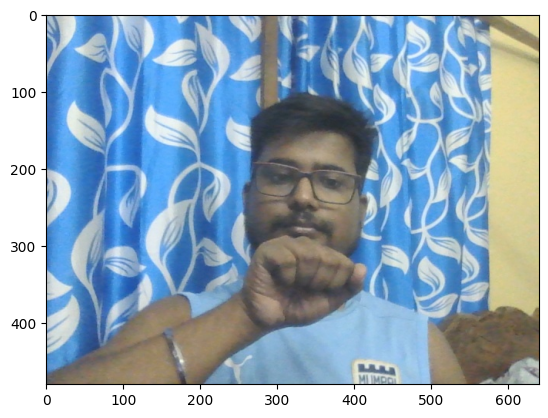

In [33]:
img = cv2.imread(IMAGE_PATH) # Reading from the path
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
# !pip install opencv-python-headless

In [45]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8, # Min no. of acuuracy (min 80 %)
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

ValueError: in user code:

    File "C:\Users\SwSaT\AppData\Local\Temp\ipykernel_15488\2399429196.py", line 12, in detect_fn  *
        image, shapes = detection_model.preprocess(image)
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 485, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\preprocessor.py", line 3330, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.


In [44]:
import tensorflow as tf
import numpy as np
import cv2

# Load the saved model
detection_model = tf.saved_model.load('Tensorflow\workspace\models\my_ssd_mobnet_640x640\train')

# Load and preprocess the image
image_np = cv2.imread('Tensorflow\workspace\images\test\A.64781d72-177a-11ee-982e-2811a889ff48.jpg')
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
image_np_expanded = np.expand_dims(image_np, axis=0)
input_tensor = tf.convert_to_tensor(image_np_expanded, dtype=tf.float32)

# Resize the image if necessary
input_tensor = tf.image.resize_images(input_tensor, (800, 600))  # Replace new_height and new_width with your desired dimensions

# Run the object detection model
detections = detection_model(input_tensor)

# Process the detections
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}

# Display the results or perform further processing


OSError: SavedModel file does not exist at: Tensorflow\workspace\models\my_ssd_mobnet_640x640	rain\{saved_model.pbtxt|saved_model.pb}

In [41]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    # Expand dimensions to create a batch of one image
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, axis=0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'] + label_id_offset,
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh=.8,  # Min no. of acuuracy (min 80 %)
        agnostic_mode=False
    )

    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break


ValueError: in user code:

    File "C:\Users\SwSaT\AppData\Local\Temp\ipykernel_15488\2399429196.py", line 12, in detect_fn  *
        image, shapes = detection_model.preprocess(image)
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 485, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\utils\shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "D:\Study\Projects\REAL-TIME OBJECT DETECTION FOR ASSISTING COMMUNICATION IN NON-VERBAL INDIVIDUALS\Verb_Obj\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\core\preprocessor.py", line 3330, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.
